In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#if 'btc' not in globals().keys():
#    btc = historical('BTC-USD', datetime.datetime(2017,7,27), granularity=86400)
#    eth = historical('ETH-USD', datetime.datetime(2017,7,27), granularity=86400)

btc = pd.read_pickle('BTC.pd')
eth = pd.read_pickle('ETH.pd')

df = pd.DataFrame({'btc': btc.Close,
                   'eth': eth.Close})

#df = df.iloc[:180]

def z_score(x, window):
    r = x.rolling(window=window)
    m = r.mean().shift(1)
    s = r.std(ddof=0).shift(1)
    z = (x - m) / s
    return z

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Cumulative Returns')

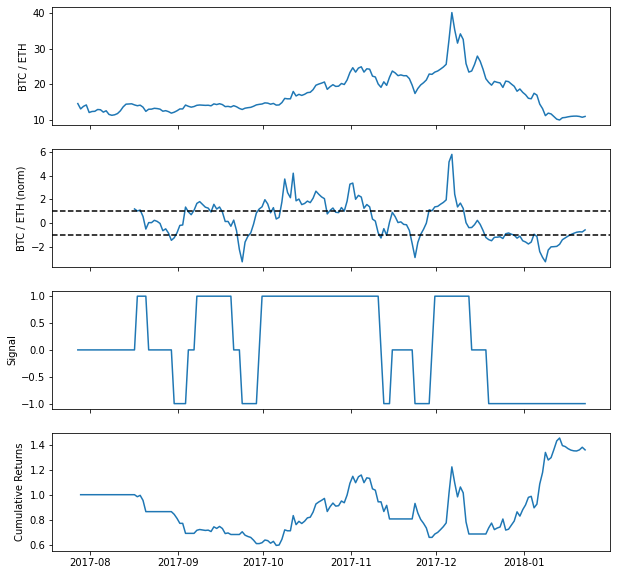

In [3]:

win_size = 20

entry_threshold = 1

df['ratio'] = df.btc / df.eth

df['norm_ratio'] = z_score(df.ratio, win_size)

# df['ratio_std'] = df.ratio.rolling(win_size).std(0)
# df['norm_ratio'] = (df.ratio - df.ratio.rolling(win_size).mean()) / df.ratio_std
df['norm_ratio_lr'] = np.log1p(df.norm_ratio.pct_change())
df['ratio_lr'] = np.log1p(df.ratio.pct_change())

df['signal'] = 0
for n in range(1, len(df)):
    signal = df.iloc[n - 1].signal
    norm = df.iloc[n - 1].norm_ratio
    new_signal = 0

    if signal == 0 and norm > entry_threshold:
        new_signal = 1
    elif signal == 0 and norm < -entry_threshold:
        new_signal = -1
    elif signal == 1 and norm < 0:
        new_signal = 0
    elif signal == -1 and norm > 0:
        new_signal = 0
    else:
        new_signal = df.iloc[n - 1].signal

    df.loc[df.index[n], 'signal'] = new_signal


f, ax = plt.subplots(4, 1, sharex=True, figsize=(10,10))

ax[0].plot(df.ratio)
ax[0].set_ylabel('BTC / ETH')

ax[1].plot(df.norm_ratio)
ax[1].axhline(entry_threshold, color='k', linestyle='--')
ax[1].axhline(-entry_threshold, color='k', linestyle='--')
ax[1].set_ylabel('BTC / ETH (norm)')
#ax[1].plot(df.v_ratio)
#ax[1].plot(df.v_norm_ratio)

ax[2].plot(df.signal)
ax[2].set_ylabel('Signal')

ax[3].plot(1+(df.signal*df.ratio_lr).cumsum())
ax[3].set_ylabel('Cumulative Returns')

Text(0, 0.5, 'Cumulative Returns')

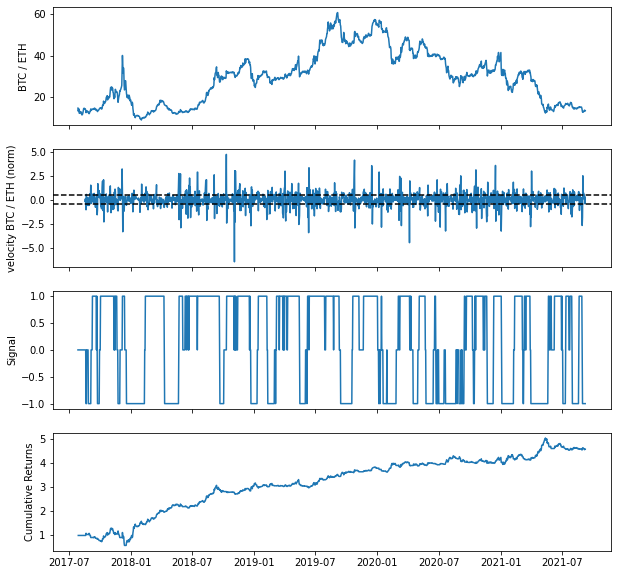

In [4]:
# Try using velocities as trade signal

entry_threshold = 0.5
win_size = 20

df['ratio'] = df.btc / df.eth
df['norm_ratio'] = z_score(df.ratio, win_size)

# Velocities
df['v_ratio'] = df.ratio - df.ratio.shift(1)
df['ratio_lr'] = np.log1p(df.ratio.pct_change())
df['v_norm_ratio'] = df.norm_ratio - df.norm_ratio.shift(1)

df['signal'] = 0
for n in range(1, len(df)):
    signal = df.iloc[n - 1].signal
    vel = df.iloc[n - 1].v_norm_ratio
    norm = df.iloc[n - 1].norm_ratio
    new_signal = 0

    if signal == 0 and vel > entry_threshold:
        new_signal = 1
    elif signal == 0 and vel < -entry_threshold:
        new_signal = -1
    elif signal == 1 and norm < 0:
        new_signal = 0
    elif signal == -1 and norm > 0:
        new_signal = 0
    else:
        new_signal = df.iloc[n - 1].signal

    df.loc[df.index[n], 'signal'] = new_signal


f, ax = plt.subplots(4, 1, sharex=True, figsize=(10,10))

ax[0].plot(df.ratio)
ax[0].set_ylabel('BTC / ETH')


#ax[1].plot(df.v_ratio)
ax[1].plot(df.v_norm_ratio)
ax[1].axhline(entry_threshold, color='k', linestyle='--')
ax[1].axhline(-entry_threshold, color='k', linestyle='--')
ax[1].set_ylabel('velocity BTC / ETH (norm)')

ax[2].plot(df.signal)
ax[2].set_ylabel('Signal')

ax[3].plot(1+(df.signal*df.ratio_lr).cumsum())
ax[3].set_ylabel('Cumulative Returns')